In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [2]:
df_train = pd.read_csv("train.csv")

df_test = pd.read_csv("test.csv")
#We're not using test data, becasue there's no Y variable
#We will use the training samples - 80% will be used for training the model
#10% will be used for validating the models
#10% will be used only for the FINAL (pre-deployment) testing 


In [3]:
print("training dataset -  rows:", df_train.shape[0]," columns:", df_train.shape[1])

training dataset -  rows: 4209  columns: 378


In [4]:
df_train.sample(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2459,4929,112.28,ak,v,r,c,d,n,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
878,1748,100.42,aj,s,as,c,d,ag,a,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
805,1577,107.62,ay,aa,as,d,d,af,g,c,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0

In [5]:
df_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [6]:
# only the categorical columns
df_train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']].sample(10)

,X0,X1,X2,X3,X4,X5,X6,X8
3255,t,aa,as,c,d,s,l,x
3245,as,v,as,a,d,s,i,f
3268,f,s,as,c,d,s,g,u
1980,s,z,as,c,d,l,j,t
660,y,aa,as,d,d,c,i,c
316,as,k,as,d,d,i,g,e
728,e,s,as,c,d,af,i,q
1585,z,aa,ai,a,d,ad,g,f
3213,o,l,as,f,d,s,g,i
741,x,aa,ae,c,d,af,l,s


In [7]:
# columns after the categorical ones
df_train[df_train.columns[10:]].sample(10)

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1474,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1969,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1559,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3471,0,0,0,0,1,0,0,0,0,0

In [8]:
np.unique(df_train[df_train.columns[10:]])

array([0, 1], dtype=int64)

#### Check for missing values

In [9]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [10]:
NAs = pd.concat([df_train.isnull().sum()], axis=1, keys=['Count of NANs'])
NAs.sample(5)

,Count of NANs
X206,0
X265,0
X378,0
X208,0
X219,0


In [11]:
NAs[NAs.sum(axis=1) > 0]
#There are no Not A Numbers, meaning there are no null (missing) values 

,Count of NANs


#### Distribution of y - histogram, normality test, outliers

In [12]:
df_train['y'].describe()
#Average time of car on the workbench is 100 seconds.
#Max is 265 seconds, and min is 72 seconds.

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [13]:
from statsmodels.graphics.gofplots import qqplot

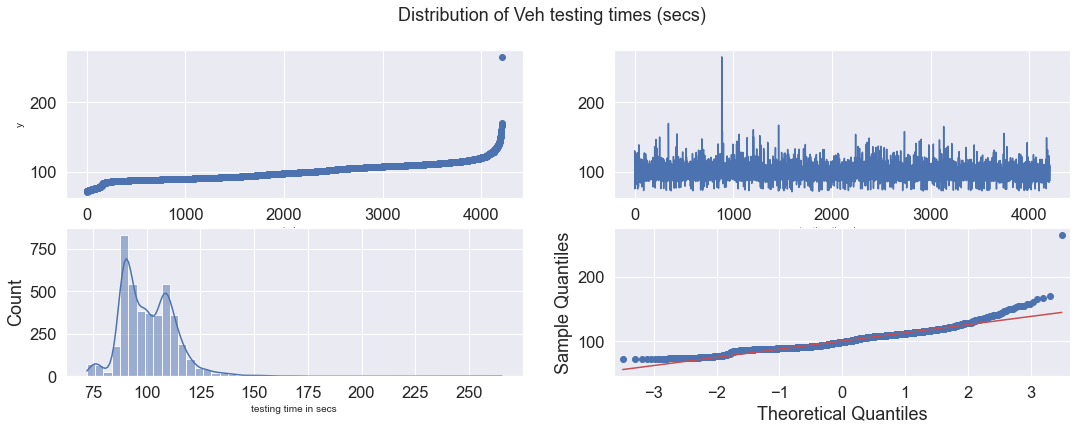

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))

fig.suptitle ('Distribution of Veh testing times (secs)', fontsize=18)

ax1.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))
ax1.set_xlabel('index', fontsize=10)
ax1.set_ylabel('y', fontsize=10)

ax2.plot(df_train['y']);
ax2.set_xlabel('testing time in secs', fontsize=10)

sns.histplot(df_train.y.values, bins=50, kde=True, ax=ax3)
ax3.set_xlabel('testing time in secs', fontsize=10)

# q-q plot
qqplot(df_train['y'], line='s', ax=ax4);  #  to see whether the distribution of data follow normal distribution.

#### Statistical Normality Tests on $y$

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

- $H_0 :$ sample drawn from a Gaussian distribution
- $H_A :$ sample NOT drawn from a Gaussian distribution

Findings:
1.Most test durations are 90 to 100 seconds
2.There are peaks between 97-98 and 108 seconds
3.The testing times are bi-modal, with two distinct peaks
4. The data is positively (right) skewed
5. There are some outliers, skewing the y (outcome) column

In [15]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

In [16]:
#Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.

In [17]:
# normality test
stat, p = shapiro(df_train['y'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.939, p=0.000
Sample does not look Gaussian (reject H0)


In [18]:
#D'Agostino K-squared Test 
#This calculates summary statistics from the data, including kurtosis and skewness 
#to determine if the data distribution departs from the normal distribution.
#Skew is a quantification of how much a distribution is left or right (asymmetry) in the distribution. Kurtosis quantifies how much of distribution is in the tail.
# A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad).



In [19]:
#normality test 
# normality test
stat, p = normaltest(df_train['y'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1302.013, p=0.000
Sample does not look Gaussian (reject H0)


In [20]:
#Anderson Test
result = anderson(df_train['y'])
p=0

print('{:15s}  {:15s}  {:15s}'.format('Significance Level', 'Test Statistic', 'Critical Value'))
print('{:15s}  {:15s}  {:15s}'.format('------------------', '--------------', '--------------'))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    
    if result.statistic < result.critical_values[i]:
        print('{:17d}%  {:14.3f}{:16.3f} Test stats < CV, (fail to reject H0)'.format(int(sl), result.statistic, cv))
    else:
        print('{:17d}%  {:14.3f}{:16.3f} Test stats >= CV, ( reject H0)'.format(int(sl), result.statistic, cv))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Significance Level  Test Statistic   Critical Value 
------------------  --------------   -------------- 
               15%          43.248           0.575 Test stats >= CV, ( reject H0)
               10%          43.248           0.655 Test stats >= CV, ( reject H0)
                5%          43.248           0.786 Test stats >= CV, ( reject H0)
                2%          43.248           0.917 Test stats >= CV, ( reject H0)
                1%          43.248           1.091 Test stats >= CV, ( reject H0)
Sample does not look Gaussian (reject H0)


#### Type of columns
let us have a look at the data type of all the variables present in the dataset.

In [21]:
dtype_df = df_train.dtypes.reset_index()
dtype_df.sample(10)

,index,0
54,X55,int64
67,X68,int64
187,X192,int64
85,X87,int64
232,X238,int64
279,X285,int64
195,X201,int64
150,X154,int64
329,X336,int64
123,X126,int64


In [22]:
dtype_df.columns = ["Count", "Column Type"]
dtype_df.head(3)

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object


In [23]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()
#369 integer columns and so on

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


#### Analyze the columns types - train

In [24]:
# possible data types in pandas
numerics= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']   # numeric
objects = ['O']                                                          # object - string - categorical

In [25]:
df_train_num = df_train.select_dtypes(include=numerics)
df_train_cat = df_train.select_dtypes(include=objects)

In [26]:
print(df_train_cat.columns)
print(df_train_num.columns)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


#### Looking into each categorical feature - train

In [27]:
# for each cat column, display the distinct values
for col_name in df_train_cat.columns:
    
    print('The unique values in '+col_name+' are: ', df_train_cat[col_name].nunique())
    
    print(df_train_cat[col_name].unique())
    #X0 has 47 different values, and so on...

The unique values in X0 are:  47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
The unique values in X1 are:  27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
The unique values in X2 are:  44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
The unique values in X3 are:  7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
The unique values in X4 are:  4
['d' 'b' 'c' 'a']
The unique values in X5 are:  29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
The unique values in X6 are:  12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
The unique values 

#### Analyze the $y $ - testing time, for each of cat columns
- to assess the usefulness of the cat columns
    - we shall use boxplot

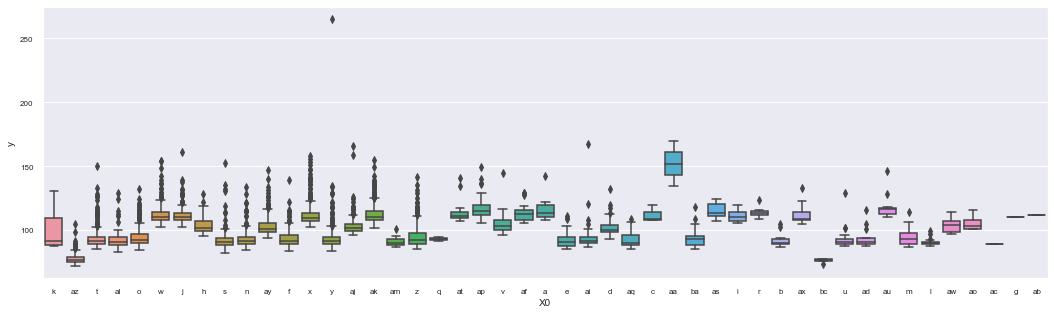

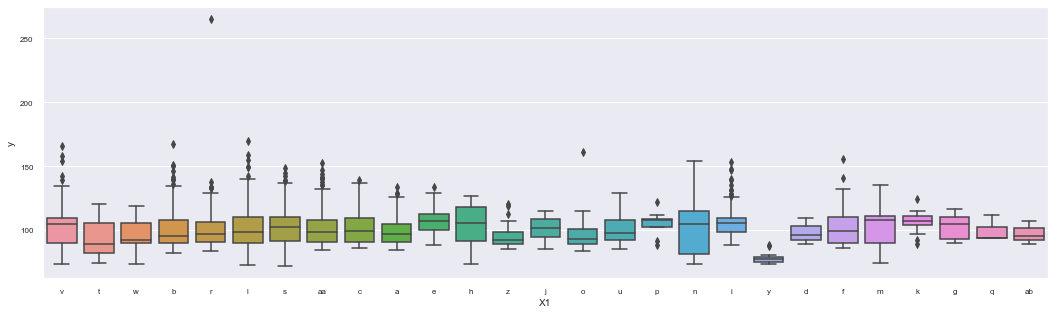

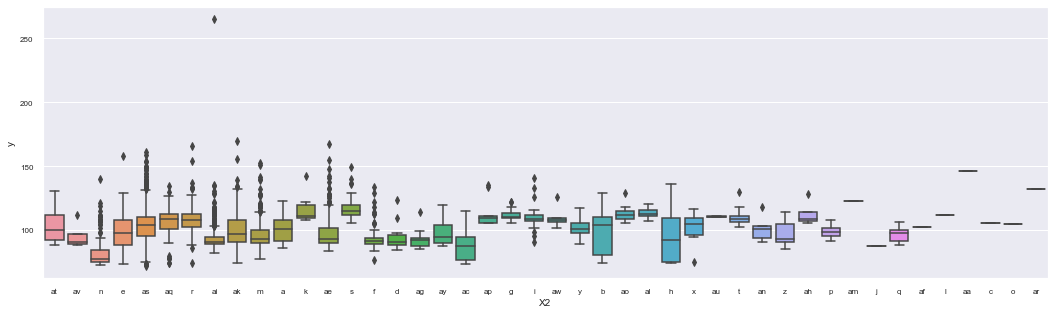

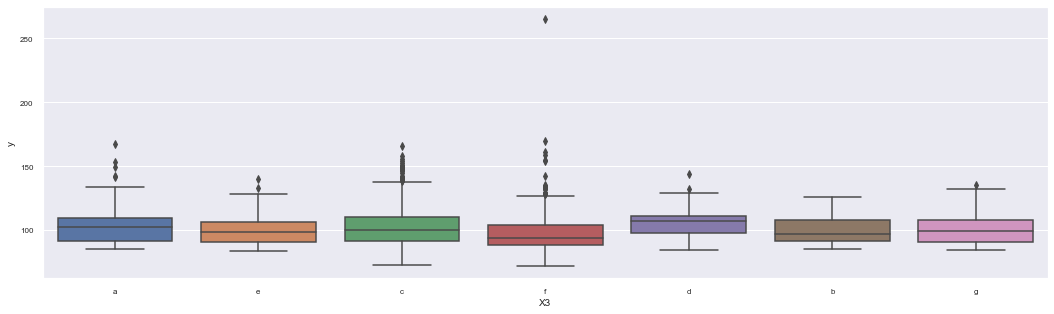

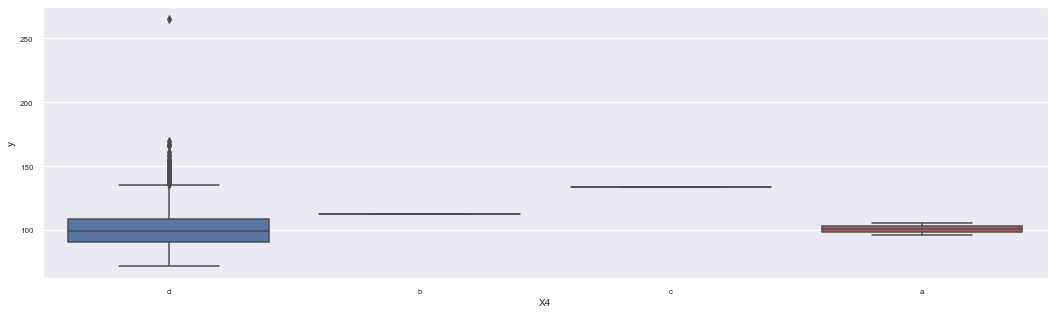

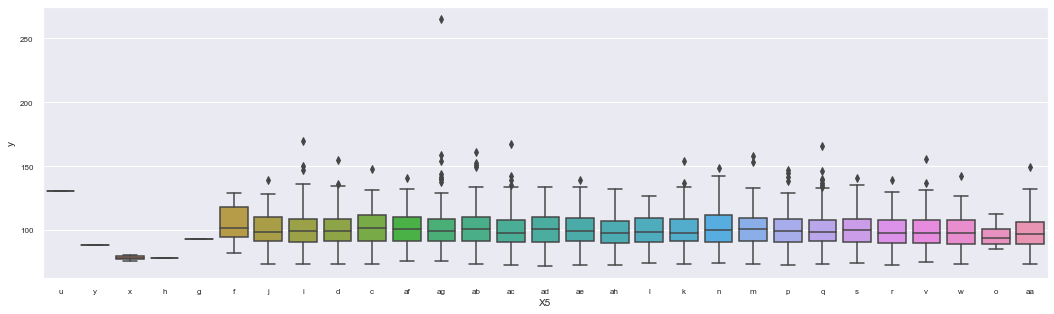

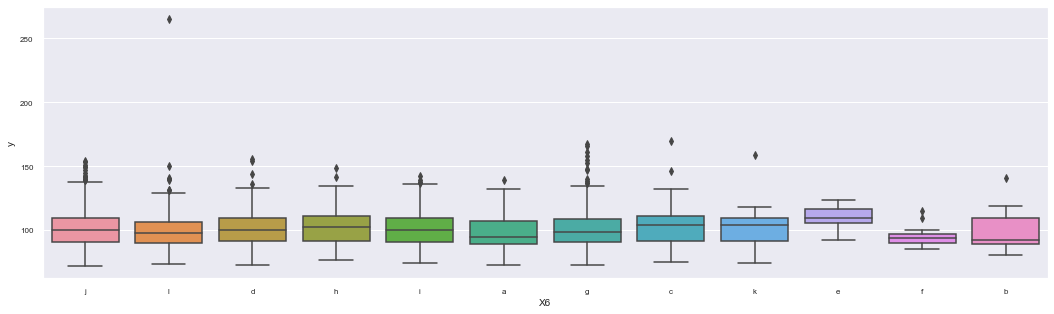

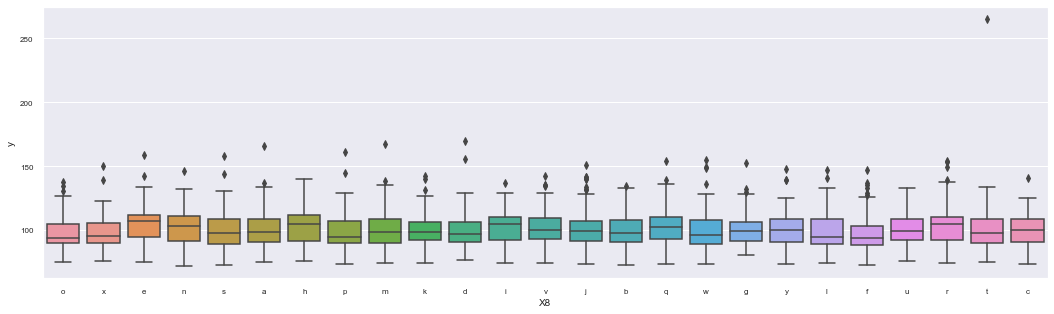

In [28]:
# value of y change for each of X0, X1...
cols=['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cols:
    plt.figure(figsize=(18, 5))
    
    sns.boxplot(x=col, y='y', data=df_train)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
#X4 doesn't seem to have much variation

#### Use of hypothesis testing (ANOVA) 
- check if the categorical variables (X0, X1, X2....X8) have strong relationship with the response variable (`y`)


In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
model = ols('y ~ C(X4)', data=df_train).fit()
print('F-statistic : ', model.fvalue)
print('p-value :', model.f_pvalue)

anova_table = sm.stats.anova_lm(model, type=2)
anova_table
#X4 is barely statistically significant.

F-statistic :  2.618896521372272
p-value : 0.049209196304656685


,df,sum_sq,mean_sq,F,PR(>F)
C(X4),3.0,1261.638003,420.546001,2.618897,0.049209
Residual,4205.0,675244.676340,160.581374,NaN,NaN


In [31]:
#Run ANOVA for all the categorical columns

colnames = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for colname in colnames:
    model = ols('y ~ ' + colname , data=df_train).fit()
    
    print('Column : {}, F-statistic : {:6.2f}, p-value : {:6.2f}'.format(colname, model.fvalue, model.f_pvalue))
    
#X4 doesn't have much variation

Column : X0, F-statistic : 122.31, p-value :   0.00
Column : X1, F-statistic :   6.99, p-value :   0.00
Column : X2, F-statistic :  28.26, p-value :   0.00
Column : X3, F-statistic :  30.99, p-value :   0.00
Column : X4, F-statistic :   2.62, p-value :   0.05
Column : X5, F-statistic :   2.15, p-value :   0.00
Column : X6, F-statistic :   4.18, p-value :   0.00
Column : X8, F-statistic :   5.03, p-value :   0.00


In [32]:
#Perform multiple pairwise comparison (Tukey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
colname='X4'
m_comp = pairwise_tukeyhsd(endog=df_train['y'], groups=df_train[colname], alpha=0.05)
print(m_comp)

#H0 is the means for a pair of gropus (say a and b) are the same
#The reject column states False - We cannot reject the null hypothesis
#But for pairs (c&d) we can reject the H0 - mean of c and mean of d are different

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b     11.7  0.875 -28.1875 51.5875  False
     a      c    32.94 0.1461  -6.9475 72.8275  False
     a      d  -0.4417    1.0 -23.4762 22.5928  False
     b      c    21.24 0.6363 -24.8181 67.2981  False
     b      d -12.1417 0.7733 -44.7136 20.4301  False
     c      d -33.3817 0.0421 -65.9536 -0.8099   True
-----------------------------------------------------


In [33]:
df_train[df_train.X4 == 'c']

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1308,2584,134.04,ak,e,ap,c,c,ac,j,j,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Check columns with 0 std dev 

These are the features which are `constant`. Since these features don't vary, it will have no effect on the model performance

In [34]:
%%time

cols_to_drop3_var0 = []

for each_col in df_train.drop(['y'], axis=1).columns:
    
    if df_train[each_col].dtypes != 'O':     # not an object col
        if df_train[each_col].std() == 0.00:
            # print('Column : {} has std dev of {}'.format(each_col, rna_merged[each_col].std()))

            stats = each_col + ' { '\
                    ' std : ' + str(df_train[each_col].std()) + \
                    ' Min : ' + str(df_train[each_col].min()) + \
                    ' Max : ' + str(df_train[each_col].min()) + " }  " 

            print(stats)              

            cols_to_drop3_var0.append(each_col)

print('number of features with 0 std : {}'.format(len(cols_to_drop3_var0)))

X11 {  std : 0.0 Min : 0 Max : 0 }  
X93 {  std : 0.0 Min : 0 Max : 0 }  
X107 {  std : 0.0 Min : 0 Max : 0 }  
X233 {  std : 0.0 Min : 0 Max : 0 }  
X235 {  std : 0.0 Min : 0 Max : 0 }  
X268 {  std : 0.0 Min : 0 Max : 0 }  
X289 {  std : 0.0 Min : 0 Max : 0 }  
X290 {  std : 0.0 Min : 0 Max : 0 }  
X293 {  std : 0.0 Min : 0 Max : 0 }  
X297 {  std : 0.0 Min : 0 Max : 0 }  
X330 {  std : 0.0 Min : 0 Max : 0 }  
X347 {  std : 0.0 Min : 0 Max : 0 }  
number of features with 0 std : 12
CPU times: total: 15.6 ms
Wall time: 25 ms


In [35]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

NameError: name 'X_train' is not defined

In [ ]:
np.cumsum(pca.explained_variance_ratio_)
#1 suggests there is some multicollinearity here.

In [ ]:
plt.figure(figsize=(16,6))
plt.bar(range(1,len(pca.explained_variance_)+1), pca.explained_variance_)

plt.ylabel('Explained variance')
plt.xlabel('Components')

plt.plot(range(1,len(pca.explained_variance_)+1),
         np.cumsum(pca.explained_variance_),
         c = 'red',
         label = 'Cumulative Explained Variance')

plt.legend(loc='upper left');

In [ ]:
pca.explained_variance_ratio_

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
%%time
# Fit regression model
params = {'n_estimators': 600, 
          'max_depth': 6, 
          'min_samples_split': .1,
          'max_features': 'sqrt',
          'learning_rate': 0.1, 
          'loss':'squared_error',
          'validation_fraction': 0.2,
          'n_iter_no_change': 5}

gbr = GradientBoostingRegressor(**params)

# Train GB regressor
gbr.fit(X_train_pca, y_train)

# Predict
y_pred = gbr.predict(X_train_pca)
model_metrics(y_train, y_pred, 'training data')

y_pred = gbr.predict(X_test_pca)
model_metrics(y_test, y_pred, 'test data')

In [ ]:

df_train.X0.dtypes

In [36]:
#Check columns with no STDV 
#These are the features which are constant. Since these features don't vary, it will have no effect on the model performance.

%time

cols_to_drop3_var0 = []

for each_col in df_train.drop(['y'], axis=1).columns:
    
    if df_train[each_col].dtypes !='O':  #not an object col
        if df_train[each_col].std() == 0.00:
            #print('Column : {} has std dev of {}'.format(each_col, rna_merged[each_col].std()))
            
            stats = each_col + '{'\
                'std : ' + str(df_train[each_col].std()) + \
                'Min : ' + str(df_train[each_col].min()) + \
                'Max : ' + str(df_train[each_col].min()) + " } "
            
            print(stats)
            
            cols_to_drop3_var0.append(each_col)
print('number of features with 0 std: {}'.format(len(cols_to_drop3_var0)))

CPU times: total: 0 ns
Wall time: 0 ns
X11{std : 0.0Min : 0Max : 0 } 
X93{std : 0.0Min : 0Max : 0 } 
X107{std : 0.0Min : 0Max : 0 } 
X233{std : 0.0Min : 0Max : 0 } 
X235{std : 0.0Min : 0Max : 0 } 
X268{std : 0.0Min : 0Max : 0 } 
X289{std : 0.0Min : 0Max : 0 } 
X290{std : 0.0Min : 0Max : 0 } 
X293{std : 0.0Min : 0Max : 0 } 
X297{std : 0.0Min : 0Max : 0 } 
X330{std : 0.0Min : 0Max : 0 } 
X347{std : 0.0Min : 0Max : 0 } 
number of features with 0 std: 12


####  Drop the unimportant columns

In [37]:
data_dropped = df_train.drop(['ID'], axis=1)

In [38]:
df_train.X11.value_counts()[0]

4209

In [39]:
cols_to_drop3_var0

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [40]:
data_dropped = df_train.drop(['ID'], axis=1)

# Outlier detection


In [41]:
#Calculate Q1 (25th percentile of the data) for the given feature
Q1 = np.percentile(df_train.loc[:, 'y'], 25)

#Calculate Q2 (50th percentile of the data) for the given feature
Q2 = np.percentile(df_train.loc[:,'y'], 50)

#Calculate Q3 (75th percentile of the data) for the given features
Q3 = np.percentile(df_train['y'], 75)

#TO DO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = (Q3-Q1)*1.5

print('Q1 = {}, Q2 = {}, Q3 ={}, outlier step value = {}'.format(Q1, Q2, Q3, step))

Q1 = 90.82, Q2 = 99.15, Q3 =109.01, outlier step value = 27.285000000000018


In [42]:
no_lower_outliers = df_train[df_train['y']<= (Q1-step)].index
no_upper_outliers = df_train[df_train['y'] > (Q3 + step)].index

print('Number of the outliers on the lower extreme side = {}'.format(no_lower_outliers))
print('Number of the outliers on the upper extreme side = {}'.format(no_upper_outliers))

print('Lower outliers = {}%'.format(no_lower_outliers/df_train.shape[0]*100))
print('Upper outliers = {}%'.format(no_upper_outliers/df_train.shape[0]*100))

Number of the outliers on the lower extreme side = Int64Index([], dtype='int64')
Number of the outliers on the upper extreme side = Int64Index([  43,  203,  216,  253,  342,  420,  429,  681,  846,  883,  889,
             900,  995,  998, 1033, 1036, 1060, 1141, 1203, 1205, 1269, 1279,
            1349, 1459, 1730, 2240, 2263, 2348, 2357, 2376, 2414, 2470, 2496,
            2735, 2736, 2852, 2887, 2888, 2905, 2983, 3028, 3090, 3133, 3177,
            3215, 3442, 3744, 3773, 3980, 4176],
           dtype='int64')
Lower outliers = Float64Index([], dtype='float64')%
Upper outliers = Float64Index([1.0216203373722974,  4.822998336897125,  5.131860299358518,
              6.0109289617486334,   8.12544547398432,  9.978617248752673,
              10.192444761225945,  16.17961511047755, 20.099786172487526,
              20.978854834877644, 21.121406509859824, 21.382751247327157,
               23.63981943454502,  23.71109527203611,  24.54264670943217,
               24.61392254692326,  25.1841

In [62]:
#Observe the severity of the outlier samples 
df_train.iloc[no_upper_outliers]['y'].sort_values(ascending=False)

883     265.32
342     169.91
1459    167.45
3133    165.52
1203    160.87
889     158.53
2735    158.23
3744    155.62
429     154.87
1060    154.43
2240    154.16
2736    153.51
1269    152.32
1205    150.89
253     150.43
1141    149.63
4176    149.52
2376    148.94
681     147.72
2905    147.22
216     146.83
3090    146.30
2887    144.56
1036    144.36
1349    142.71
2357    142.71
3980    142.46
2852    141.39
900     141.31
3215    141.09
846     140.49
1033    140.41
3028    140.31
2348    140.25
995     140.15
1730    139.61
43      139.20
2983    139.16
1279    139.08
3442    139.07
2888    138.19
2470    137.49
998     137.44
3177    137.32
2496    137.09
2263    136.96
3773    136.75
2414    136.56
420     136.47
203     136.41
Name: y, dtype: float64

##### One Hot Encoding

In [63]:
data_dropped = pd.get_dummies(data_dropped)
data_dropped.shape

(4209, 564)

In [64]:
df_train.drop(columns=['X93', 'X107','X233','X235', 'X268','X289','X290', 'X293','X297', 'X330', 'X347'])

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0

#### Separate features and target column

In [65]:
X = data_dropped.drop(['y'], axis=1)
y = data_dropped.y

#### Train test split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [68]:
X_train.shape, X_test.shape

((3367, 563), (842, 563))

In [69]:
X_train.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,...,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,X0_ao,X0_ap,X0_aq,X0_as,X0_at,X0_au,X0_aw,X0_ax,X0_ay,X0_az,X0_b,X0_ba,X0_bc,X0_c,X0_d,X0_e,X0_f,X0_g,X0_h,X0_i,X0_j,X0_k,X0_l,X0_m,X0_n,X0_o,X0_q,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z,X1_a,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,X1_j,X1_k,X1_l,X1_m,X1_n,X1_o,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z,X2_a,X2_aa,X2_ac,X2_ae,X2_af,X2_ag,X2_ah,X2_ai,X2_ak,X2_al,X2_am,X2_an,X2_ao,X2_ap,X2_aq,X2_ar,X2_as,X2_at,X2_au,X2_av,X2_aw,X2_ay,X2_b,X2_c,X2_d,X2_e,X2_f,X2_g,X2_h,X2_i,X2_j,X2_k,X2_l,X2_m,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_x,X2_y,X2_z,X3_a,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_a,X4_b,X4_c,X4_d,X5_aa,X5_ab,X5_ac,X5_ad,X5_ae,X5_af,X5_ag,X5_ah,X5_c,X5_d,X5_f,X5_g,X5_h,X5_i,X5_j,X5_k,X5_l,X5_m,X5_n,X5_o,X5_p,X5_q,X5_r,X5_s,X5_u,X5_v,X5_w,X5_x,X5_y,X6_a,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_a,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
3310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3334,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,

In [70]:
# import libraries for metrics and reporting
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

In [71]:
def model_metrics(y_true, y_hypothesis, test='test data'): 
    print("metrics using {} ...".format(test))
    print('Mean Abs Error   MAE    : ', mean_absolute_error(y_true, y_hypothesis))
    print('Mean Sq  Error MSE      : ', mean_squared_error(y_true, y_hypothesis))
    print('Root Mean Sq Error RMSE : ', np.sqrt(mean_squared_error(y_true, y_hypothesis)))
    print('MAPE                    : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    print('MPE                     : ', np.mean((y_true - y_pred) / y_true) * 100)
    print('r2 value                : ', r2_score(y_true, y_hypothesis))

    print('\n')

Linear Regression


In [81]:
from sklearn.linear_model import LinearRegression

#instantiate the lin reg model
linreg = LinearRegression()

#fit the data
linreg.fit (X_train, y_train)

LinearRegression()

In [82]:
#predict (training samples)
y_pred = linreg.predict(X_train)
model_metrics(y_train, y_pred, 'training data')

#predict (testing samples)
y_pred = linreg.predict(X_test)
model_metrics(y_test, y_pred, 'test data')

#Training r square is 62%, testing is not good.

metrics using training data ...
Mean Abs Error   MAE    :  4.967342195389071
Mean Sq  Error MSE      :  59.786899664754614
Root Mean Sq Error RMSE :  7.7321988893687035
MAPE                    :  4.743980434598679
MPE                     :  -0.49230074988069716
r2 value                :  0.6264799366259681


metrics using test data ...
Mean Abs Error   MAE    :  46087898417.61054
Mean Sq  Error MSE      :  3.657818467547759e+23
Root Mean Sq Error RMSE :  604799013520.0089
MAPE                    :  47568234436.00408
MPE                     :  12628401520.057932
r2 value                :  -2.2392150846398713e+21




# Cross validate

In [87]:


#import libraries for model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kf = KFold(n_splits=10, shuffle=True, random_state=20)

%time
scoring = {'r2':'r2',
           'MSE': 'neg_mean_squared_error'}

#instantiate the lin reg model
linreg = LinearRegression()

scores = cross_validate(estimator=linreg,
                        X=X_train,
                        y=y_train,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True)

#print('Score keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))
print('Training MSE: {}'.format(scores['train_MSE'].mean()))
print('Testing MSE: {}'.format(scores['test_MSE'].mean()))

#High dimensionality
#Multi-collinearity

CPU times: total: 0 ns
Wall time: 0 ns
Training r2 : 0.6308183047004796
Testing r2 : -2.090440757804151e+22
Training MSE: -59.13411448663184
Testing MSE: -3.6398694864577523e+24


#### Model - RF

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
%%time
# Fit Random Forest regressor model
params = {'n_estimators': 100, 
          'min_samples_split': 0.01,
          'max_depth': 10, 
          'max_features': 'sqrt', 
          'max_samples': 0.9
}

rfr = RandomForestRegressor(**params)

rfr.fit(X_train, y_train)

# predict (training samples)
y_pred = rfr.predict(X_train)
model_metrics(y_train, y_pred, 'training data')


# predict (testing samples)
y_pred = rfr.predict(X_test)
model_metrics(y_test, y_pred, 'test data')

metrics using training data ...
Mean Abs Error   MAE    :  5.263375446461294
Mean Sq  Error MSE      :  66.4315907492414
Root Mean Sq Error RMSE :  8.150557695596136
MAPE                    :  5.036346476858903
MPE                     :  -0.6166937615922177
r2 value                :  0.5849670726223927


metrics using test data ...
Mean Abs Error   MAE    :  5.612550701412483
Mean Sq  Error MSE      :  70.59951059036219
Root Mean Sq Error RMSE :  8.402351491717196
MAPE                    :  5.3766894343708636
MPE                     :  -0.5577097766075494
r2 value                :  0.5678093637377393


CPU times: total: 766 ms
Wall time: 299 ms


#### Gradient boosting regressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
#Be sure to put in terminal: pip install—upgrade xgboost
#Conda install xgboost


In [91]:
%%time
# Fit regression model
params = {'n_estimators': 600, 
          'max_depth': 6, 
          'min_samples_split': .1,
          'max_features': 'sqrt',
          'learning_rate': 0.1, 
          'loss':'squared_error',
          'validation_fraction': 0.2,
          'n_iter_no_change': 5}

gbr = GradientBoostingRegressor(**params)

# Train GB regressor
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_train)
model_metrics(y_train, y_pred, 'training data')

y_pred = gbr.predict(X_test)
model_metrics(y_test, y_pred, 'test data')

metrics using training data ...
Mean Abs Error   MAE    :  5.068565278312852
Mean Sq  Error MSE      :  63.93722583520528
Root Mean Sq Error RMSE :  7.996075652168711
MAPE                    :  4.8251913746006725
MPE                     :  -0.4899210045535106
r2 value                :  0.6005506761541539


metrics using test data ...
Mean Abs Error   MAE    :  5.401269463904375
Mean Sq  Error MSE      :  68.04239270491644
Root Mean Sq Error RMSE :  8.24878128603956
MAPE                    :  5.1398187067101375
MPE                     :  -0.3554204468468354
r2 value                :  0.5834633306939815


CPU times: total: 141 ms
Wall time: 150 ms


####  XGboost Regression model

In [92]:
# pip install xgboost
import xgboost as xgb


In [93]:
# Creating DMatrices for Xgboost training
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

### The params dictionary

In [94]:
# Prepare dict of params for xgboost model.
# reg_alpha - L1
# reg_lambda - L2
xgb_params = {
    'max_depth': 9,
    'min_child_weight': 1,
    'eta':.01,                        # learning_rate, 0-1
    'subsample': 1,                   # randomly sample the training data 
    'colsample_bytree': .5,
    'objective':'reg:squarederror',
    'reg_alpha': 4.1,                 # 4.1
    'reg_lambda': .0001,
    'eval_metric': 'mae',
    'validate_parameters': 1,
    'verbose_eval': True,
    'verbosity': 0                    # 0- silent, 1-warning, 2-info, 3-debug
}

Let’s train a model with it and see how well it does on our test set!

In [95]:
%%time
model_xgb = xgb.train(
                xgb_params,
                dtrain,
                num_boost_round = 999,
                evals           = [(dtest, "Test")],
                early_stopping_rounds=10, 
)

[0]	Test-mae:99.00276
[1]	Test-mae:98.01411
[2]	Test-mae:97.03572
[3]	Test-mae:96.06706
[4]	Test-mae:95.10348
[5]	Test-mae:94.15420
[6]	Test-mae:93.21446
[7]	Test-mae:92.28384
[8]	Test-mae:91.36266
[9]	Test-mae:90.45013
[10]	Test-mae:89.54718
[11]	Test-mae:88.65331
[12]	Test-mae:87.76830
[13]	Test-mae:86.89219
[14]	Test-mae:86.02472
[15]	Test-mae:85.16601
[16]	Test-mae:84.31552
[17]	Test-mae:83.47459
[18]	Test-mae:82.64129
[19]	Test-mae:81.81616
[20]	Test-mae:80.99945
[21]	Test-mae:80.19052
[22]	Test-mae:79.39018
[23]	Test-mae:78.59835
[24]	Test-mae:77.81496
[25]	Test-mae:77.03804
[26]	Test-mae:76.26943
[27]	Test-mae:75.50731
[28]	Test-mae:74.75406
[29]	Test-mae:74.00786
[30]	Test-mae:73.26955
[31]	Test-mae:72.53836
[32]	Test-mae:71.81507
[33]	Test-mae:71.09912
[34]	Test-mae:70.38938
[35]	Test-mae:69.68832
[36]	Test-mae:68.99235
[37]	Test-mae:68.30375
[38]	Test-mae:67.62253
[39]	Test-mae:66.94897
[40]	Test-mae:66.28138
[41]	Test-mae:65.62036
[42]	Test-mae:64.96560
[43]	Test-mae:64.3180

In [61]:
# Predict
y_pred = model_xgb.predict(dtrain)
model_metrics(y_train, y_pred, 'training data')

y_pred = model_xgb.predict(dtest)
model_metrics(y_test, y_pred, 'test data')

metrics using training data ...
Mean Abs Error   MAE    :  3.880120853234867
Mean Sq  Error MSE      :  39.620891100011605
Root Mean Sq Error RMSE :  6.294512777015518
MAPE                    :  3.618719585772876
MPE                     :  1.4954422504906486
r2 value                :  0.7524675499549891


metrics using test data ...
Mean Abs Error   MAE    :  5.225196830405192
Mean Sq  Error MSE      :  74.63661051461949
Root Mean Sq Error RMSE :  8.639248260966893
MAPE                    :  4.871361742422253
MPE                     :  1.400759745317255
r2 value                :  0.5430953569361499




In [ ]:
#Based on the XGBoost model, the model was able to score an R-square of 75%.